## **Linear vs. Nonlinear**

The "make_moons" data creation routine in sklearn produces non-linear data that is useful for understanding the difference between linear and non-linear classifiers.  he 

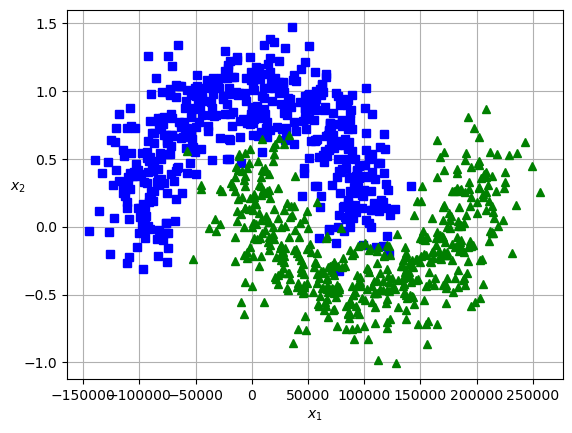

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000


def plot_dataset(X, y, axes=None):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    if axes:
        plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plot_dataset(X, y)

**Exercise 1**

Using a simple train test split, run a simple LogisticRegression classifier on the above data. Try different solvers.  Which works the best?

the lbfgs solver

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
# log_reg.fit(X_train, y_train)

param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=2, refit=True)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'solver': 'lbfgs'}
Best score:  0.8


**Exercise 2**

Note that the two dimensions have vastly different magnitudes. Modify the above, using a standard scaler and pipeline to transform the data.  Does it help?  
Yes it did help as the train accuracy is a bit higher 

Do the different solvers have the same relative performance?
No this time the liblinear solver performed the best which must have been better than the block above.



In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
X, y

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
train_X_scaled = min_max_scaler.fit_transform(X)
Train_X_Scaled = pd.DataFrame(train_X_scaled)

X_train, X_test, y_train, y_test = train_test_split(Train_X_Scaled, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
# log_reg.fit(X_train, y_train)

param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=2, refit=True)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'solver': 'liblinear'}
Best score:  0.8200000000000001


**Exercise 3**

Try the different following methods to classify your data:

1) GaussianNB
2) KNN (pick the best "nearest neighbors" parameter you can)
3) SVC, linear kernel
4) SVC, poly kernel
5) SVC, rbf kernel

Which performs the best?  Why do you think that is?

The SVC with the RBF kernel performed the best, I think this is because the rbf kernel maps the data to more deimensions using the gaussian distribution while the poly kernel almost makes random guesses and combines features.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create classifiers
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='linear'),
    SVC(kernel='poly'),
    SVC(kernel='rbf')
]

# Perform cross-validation and evaluate accuracy scores
scores = []
for clf in classifiers:
    clf_scores = cross_val_score(clf,X_train, y_train, cv=2)
    scores.append(clf_scores.mean())

# Find the best performing classifier
best_index = scores.index(max(scores))
best_classifier = classifiers[best_index]

# Print the results
print("Accuracy scores:")
for i, score in enumerate(scores):
    print(f"Classifier {i+1}: {score}")

print(f"\nThe best performing classifier is Classifier {best_index+1} with an accuracy score of {max(scores)}")


Accuracy scores:
Classifier 1: 0.8
Classifier 2: 0.8333333333333333
Classifier 3: 0.8
Classifier 4: 0.8
Classifier 5: 0.8400000000000001

The best performing classifier is Classifier 5 with an accuracy score of 0.8400000000000001


**Exercise 4**

In the following, I've set up some code to explore the impact of different parameters and data on an SVC.  As implemented, the current code illustrates how an 'rbf' kernel can overfit the data.  Vary the parameters to examine how different parameters influence performance and overfitting.

1) Try changing the amount of noise in the dataset.  What happens?

the train and test accuracy diverge as the noise increases 
2) Try changing the parameter 'gamma.'  What setting seems to avoid overfitting while still performing well.  Have a look at the SVC [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) so you have an understanding of what's going on.
C values closser to 0 seem to avoid overfitting while maintaining similar performance
3) Try changing the kernel to a 'poly' kernel, and modify gamma as necessary.  How does this affect performance?
higher gamma values lead to overfitting while lower ones lead to underfitting 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a noisy moons dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of C values to explore
C_values = np.logspace(-2, 2, 10)  # From very small to somewhat larger (10^4) C values
train_scores = []
test_scores = []

# Explore the effect of C
for C in C_values:
    clf = SVC(C=C, kernel='poly', gamma=6)  # Using 'scale' for gamma as an example
    clf.fit(X_train, y_train)
    
    # Record training and test scores
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, label='Training Accuracy')
plt.semilogx(C_values, test_scores, label='Test Accuracy')
plt.legend()
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVC Performance (RBF Kernel)')
plt.grid(True)
plt.show()